## 오류를 고치는 방법

 - 오류를 찾아 고치려면 추리소설 탐정처럼 하면 된다
 
 - 오류가 발생한 현장(코드)를 꼼꼼이 살펴보고, 프로그램이 죽기 전에 남긴 오류 메시지를 해석하고, 로그 기록에 따라 프로그램의 실행 흐름을 추적하고, 테스트 환경을 꾸며 오류를 재현해보면 대부분의 오류를 해결할 수 있다

### 코드 리뷰

 - 오류를 해결하는 가장 기본적인 방법은 코드를 자세히 살펴보는 것이다
 
 - 자기 코드를 잘 읽어보는 것과 동료의 코드를 검토해주는 것 모두 중요하다
 
 - 작성한 코드를 꼼꼼히 읽고 검토하는 것을 코드 리뷰(code review)라고 한다
 
 - 간단한 코드 리뷰를 진행해보자
 
 - 다음 프로그램에 오류가 있는지 없는지, 있다면 무엇이 오류인지 생각해보자

In [1]:
# 오류 찾기 (debug_1.py)

들짐승 = {'사자', '박쥐', '늑대', '곰'}
날짐승 = {'독수리', '매', '박쥐'}
육지생물 = 날짐승 + 들짐승
print('육지생물: ', 육지생물)

TypeError: unsupported operand type(s) for +: 'set' and 'set'

### 오류 메시지

 - 오류가 있는 프로그램을 실행하면 오류 메시지가 출력된다
 
 - 오류 메시지는 오류가 발생한 지점과 원인을 담고 있어 오류 해결의 실마리가 되는 중요한 단서다
 
 - 위의의 프로그램을 실행하면 아래와 같은 오류 메시지가 출력된다
 
 - 메시지를 읽어보고 무엇이 문제인지 생각해보자

 - 실행 결과:

```
Traceback (most recent call last):
  File "debug_1.py", line 3, in <module>
    육지생물 = 날짐승 + 들짐승
TypeError: unsupported operand type(s) for +: 'set' and 'set'
```

 - 오류 메시지는 여러 행으로 되어 있다
 
 - `Traceback (most recent call last):`이란 오류를 발생시킨 함수 호출을 역추적한 내용이라는 뜻이다
 
 - 그 아래에 오류를 일으킨 코드가 순서대로 나열되는데, 위 메시지에서는 하나 뿐이다
 
 - `File "debug1.py", line 3, in <module>`은 debug1.py 파일(File)의 세번째 행(line)에 오류가 있다는 뜻이다
    
 - 그리고 오류를 발생시킨 코드가 `육지생물 = 날짐승 + 들짐승`이라고 출력되었다

 - 오류 메시지의 마지막 행은 오류의 종류와 문제점을 알려준다
 
 - `TypeError`는 오류가 데이터 유형과 관련된 오류라는 뜻이다
 
 - 콜론(:) 뒤의 메시지 `unsupported operand type(s) for +: 'set' and 'set'`는 무엇이 문제인지 알려준다
 
 - 해석해보면 “+는 피연산자 유형을 지원하지 않음: ‘set’, ‘set’“이라는 뜻이다
 
 - 즉, + 연산자로 집합과 집합을 연산할 수 없다는 뜻이다 --> 집합과 집합은 + 연산자로 합할 수 없다!
 
 - 5장에서 알아본 것처럼, 합집합을 구하려면 | 연산자나 union() 메서드를 사용해야 한다

In [2]:
# 오류 수정하기

들짐승 = {'사자', '박쥐', '늑대', '곰'}
날짐승 = {'독수리', '매', '박쥐'}
육지생물 = 날짐승 | 들짐승
print('육지생물: ', 육지생물)

육지생물:  {'독수리', '매', '늑대', '사자', '박쥐', '곰'}


 - 오류 메시지만 잘 읽어도 대부분의 오류를 쉽게 해결할 수 있다
 
 - 하지만 오류 메시지가 출력되는 것은 구문 오류, 실행시간 오류뿐이다
 
 - 논리 오류에는 오류 메시지가 없다

#### 초보자가 접하기 쉬운 오류 메시지

 - 오류 메시지가 영어로 되어 있어 해석하기 부담될 수 있다
 
 - 그렇지만 오류 메시지를 무시해서는 안 된다
 
 - 사전을 찾으며 능력껏 해석해보고, 번역기 프로그램을 사용해서라도 읽어보자
 
 - 언어는 사용할수록 늘기 때문에 처음에는 힘들더라도 오류 메시지를 자주 읽으면 금세 익숙해 수 있다

 - 참고용으로 초보자가 접하기 쉬운 오류 메시지 몇 개를 해석해 두었다

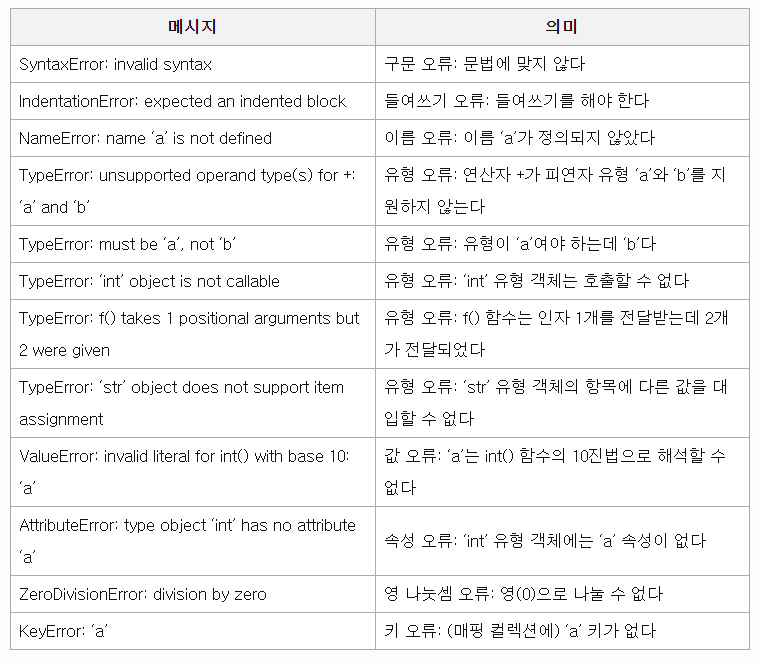

In [3]:
from IPython.display import Image
Image("img/02_img.png")

#### 함수 호출 역추적

 - 함수 호출이 여러 단계에 걸쳐 연쇄적으로 일어난 경우, 오류 메시지는 그 호출 과정을 모두 알려준다
 
 - 그 중간과정을 모두 출력하면 오류 메시지가 매우 길어지기도 한다

 - 오류 메시지에 함수 호출 과정이 포함되어야 하는 이유는 무엇일까? 어떤 코드가 함수를 호출했는데, 호출된 함수 속에서 오류가 발생했다고 하자
 
 - 그러면 수정해야 할 것은 호출된 함수일까, 함수를 호출한 코드일까? 컴퓨터는 둘 중 무엇이 문제인지 판단할 수 없다
 
 - 간단한 예를 아래에서 확인 해보자

In [5]:
# 함수 연쇄 호출 속의 오류(debug_2.py)

def a(x):
    return 8 / x      # x가 0인 경우 오류 발생

def b(y):
    return a(y - 1)   # y가 1인 경우 오류 발생

def c(z):
    return b(z - 2)   # z가 3인 경우 오류 발생

c(3)

ZeroDivisionError: division by zero

 - 위 코드의 함수 a()는 0을 입력받았을 때 0으로 나누는 오류를 일으킨다
 
 - 그리고 함수 b()는 a()를 호출함으로써 오류를 일으킬 가능성이 있고, 이는 b()를 호출하는 함수 c()도 마찬가지다
 
 - 결국 마지막 행에서 c(3)을 실행함으로써 오류가 발생한다
 
 - 그렇다면 이 프로그램에서 오류를 일으키는 원인 코드는 무엇일까? 
 
 - 그것은 프로그램의 요구조건과 맥락에 따라 프로그래머가 스스로 판단해야 할 문제다
 
 - 그래서 오류 메시지는 함수 연쇄 호출 과정을 프로그래머에게 모두 알려준다
 
 - 실행 결과는 아래와 같음을 볼 수 있다
 
```
Traceback (most recent call last):
  File "debug_2.py", line 10, in <module>
    c(3)
  File "debug_2.py", line 8, in c
    return b(z - 2)   # z가 3인 경우 오류 발생
  File "debug_2.py", line 5, in b
    return a(y - 1)   # y가 1인 경우 오류 발생
  File "debug_2.py", line 2, in a
    return 8 / x      # x가 0인 경우 오류 발생
ZeroDivisionError: division by zero
```

 - 두 번째 행부터 마지막 행 전 까지의 메시지는 호출된 함수를 역추적하여 출력한 것이다
 
 - 가장 먼저 실행된 c(3) 코드부터 연쇄적으로 호출된 c(), b(), a() 함수의 문제가 되는 부분이 각각 출력되었다
 
 - 자세히 살펴보고 오류 메시지의 의미를 완전히 이해하는 연습을 하자

 - 오류 메시지가 길고 복잡한 것은 대개 함수 호출 역추적 정보탓이다
 
 - 컴퓨터의 입장에서는 오류 수정에 꼭 필요한 내용만을 간결하게 보고한 것이다
 
 - 역추적 정보를 따라 오류가 발생한 지점을 추적해 어디를 고쳐야할지 찾는 실력을 갖추자

###### 연습문제 9-1 오류 메시지로 오류 알아내기

 - 다음은 중앙값(값들을 크기순으로 정렬했을 때 가운데 위치하는 값)을 구하는 프로그램이다

```
def median(data):
    """데이터의 중앙값을 반환한다."""
    sorted_data = sorted(data)
    median_value = sorted_data[len(sorted_data) / 2]
    return median_value

print(median([10, 9, 4, 1, 5, 7]))
```

 - 이 프로그램을 실행하면 다음과 같은 오류가 발생한다

```
Traceback (most recent call last):
  File "exercise_9_1.py", line 7, in <module>
    print(median([10, 9, 4, 1, 5, 7]))
  File "exercise_9_1.py", line 4, in median
    median_value = sorted_data[len(sorted_data) / 2]
TypeError: list indices must be integers or slices, not float
```

 - 이 오류 메시지를 읽고 문제점을 지적한 후, 올바르게 수정해 보아라

### 로그

 - 그리스 신화의 영웅 테세우스는 다이달로스의 미궁을 헤쳐나갈 때 실타래를 이용해 지나온 길을 표시했다고 한다
 
 - 프로그램의 실행 흐름이라는 미궁을 헤쳐나갈 때도 실타래가 있다면 좋을 것이다
 
 - 프로그램을 실행하는 도중에 화면, 파일, 데이터베이스 등의 장소에 **중간 기록을 남겨 두면 프로그램의 흐름과 상태를 파악하기 좋다**
 
 - 이런 실행 기록을 **로그(log)** 라고 한다.

 - 오류 메시지도 로그의 일종이다
 
 - 오류 메시지는 오류가 발생했을 때만 기록된다
 
 - 하지만 오류가 났을 때만 로그를 남기라는 법은 없다
 
 - 프로그래머가 필요하다고 판단하면, 언제든 어떤 내용이든 로그로 남길 수 있다
 
 - 변수에 어떤 값이 대입되어 있었는지, 사용자가 입력한 값은 무엇인지, 시간은 언제였는지 등 디버그에 도움되는 다양한 정보를 기록할 수 있다

 - 오류 메시지는 자동으로 출력되지만, 로그 출력은 여러분이 프로그램 속에서 직접 지시해야 한다
 
 - **로그를 남기는 가장 간단한 방법은 print() 함수로 추적할 내용을 출력하는 것이다** 
 
 - 다음은 위의 코드에 로그 출력을 추가한 것이다

In [6]:
# 함수 연쇄 호출 속의 오류(debug_3.py)

print('프로그램 실행됨')

def a(x):
    print('함수 호출됨: a()  <= ', x)
    return 8 / x      # x가 0인 경우 오류 발생

def b(y):
    print('함수 호출됨: b()  <= ', y)
    return a(y - 1)   # y가 1인 경우 오류 발생

def c(z):
    print('함수 호출됨: c()  <= ', z)
    return b(z - 2)   # z가 3인 경우 오류 발생

print('명령 실행: c(3)')
c(3)

print('프로그램 종료됨')

프로그램 실행됨
명령 실행: c(3)
함수 호출됨: c()  <=  3
함수 호출됨: b()  <=  1
함수 호출됨: a()  <=  0


ZeroDivisionError: division by zero

 - 프로그램의 시작과 종료, 함수 호출, 명령 실행 등 다양한 시점에 필요한 정보(프로그램 진행상황, 함수에 전달된 인자 등)를 출력했다
 
 - 이 프로그램을 실행하면 오류 메시지와 별도로 프로그램 실행 과정이 출력된다
 
 - **로그를 보면 함수가 호출된 과정과 데이터를 파악할 수 있다**
 
 - 함수 a()에 0이 입력되었다는 것도 분명히 확인할 수 있다
 
 - 이 예는 간단해서 오류 메시지 만으로도 오류를 잡을 수 있었다
 
 - 하지만 **프로그램이 복잡하게 뒤엉켜서 흐름을 파악하기 힘들 때, 특정한 상태에서만 오류가 발생할 때, 논리 오류가 발생해 오류 메시지의 도움을 받을 수 없을 때는 로그가 큰 도움이 된다**

### 테스트

 - **테스트(test)란 프로그램의 실행 조건을 통제하며 다양한 실험을 해 보고 오류를 찾는 활동이다**
 
 - 오류가 가끔씩만 발생할 때, 정확히 어떤 조건에서 그런 것인지 테스트해야 한다
 
 - 오류 메시지의 도움을 받을 수 없는 논리 오류를 파악할 때도 이 방법이 필요하다

#### 단위 테스트

 - **프로그램 전체를 실행하여 오류를 파악하기란 쉽지 않다**
 
 - 프로그램은 여러 데이터와 함수가 복잡한 구조 속에서 유기적으로 동작하기 때문이다
 
 - 오류가 있다는 것은 알아도 그 오류가 어디서 왜 발생하는지 알기는 무척 어려울 것이다
 
 - 프로그램 전체를 실행하는 시간과 노력도 큰 비용이다

 - 여기서도 **문제를 나누어 해결하는 방법**이 빛을 발한다
 
 - 프로그램은 여러 함수로 이루어져 있다
 
 - 프로그램을 구성하는 모든 함수가 올바르게 동작하다면, 전체 프로그램도 올바르게 동작할 것이다
 
 - 그러므로 전체 프로그램 대신 개별 함수의 동작만 잘 확인하면 된다
 
 - 함수의 동작은 전달된 인자에 달려 있으므로, 다양한 값을 인자로 전달해 테스트해보면 된다
 
 - 이처럼 프로그램의 구성 요소를 테스트하는 것을 **단위 테스트(unit test)** 라고 한다

 - 다음은 월을 입력받아 그에 대응하는 계절을 출력하는 함수다
 
 - 오류가 무엇인지 찾아보자

In [7]:
# 잘못된 계절 함수?!

def season(month):
    """월(month)에 대응하는 계절을 반환한다."""
    if month < 3:
        return '겨울'
    if month < 6:
        return '봄'
    if month < 9:
        return '여름'
    if month < 12:
        return '가을'

 - 코드를 검토하는 것만으로 오류를 찾을 수 있었는가? 그렇지 못했더라도 괜찮다
 
 - 함수의 처리 범위인 1월부터 12월까지를 모두 함수에 입력해 테스트해보면 된다
 
 - 입력 월이 12월일 때는 '겨울'이 아니라 None을 반환하므로 논리 오류이다
 
 - 아래에서 확인해보자

In [8]:
# 함수의 입력 허용 범위 테스트하기

for month in range(1, 13):
    print(month, '월:', season(month))

1 월: 겨울
2 월: 겨울
3 월: 봄
4 월: 봄
5 월: 봄
6 월: 여름
7 월: 여름
8 월: 여름
9 월: 가을
10 월: 가을
11 월: 가을
12 월: None


#### 입력 데이터의 범위가 무제한일 때

 - 앞에서 든 예는 함수가 입력받는 데이터의 범위가 열두 개에 불과하여, 입력할 수 있는 데이터를 모두 입력해보기가 쉬웠다
 
 - 하지만 abs(), len() 함수처럼, 입력받는 데이터의 범위가 무한한 것도 많다
 
 - 이런 함수는 모든 값을 다 입력해볼 수 없을 텐데, 어떻게 검사해야 할까?
 
 - 예를 들어, 문자열을 입력받아 반반씩 나누는 함수를 생각해 보자

In [9]:
# 문자열을 반으로 나누는 함수

def half_and_half(s):
    """문자열 s를 입력받아, 반반으로 나누어 반환한다."""
    center = len(s) // 2  # 중간 위치
    return (s[:center], s[center:])

 - 이 함수에 입력할 수 있는 **문자열의 범위는 무한**하므로, **모든 경우를 테스트할 수는 없다**
 
 - 이런 경우에는 **입력할 수 있는 데이터의 성격을 고려**해야 한다
 
 - **함수가 입력받을 데이터에는 흔히 함수에 입력될 것으로 기대되는 데이터와 예외적인 데이터**가 있다
 
 - 둘 다 테스트해보아야 하지만, **특히 예외적인 데이터를 빠트리지 않고 테스트하는 것이 중요**하다

 - 이 함수의 경우, 일반적인 데이터는 어중간한 길이의 짝수로 된 문자열이 될 것이다
 
 - 일반적인 데이터에 대해 이 함수는 잘 동작한다

In [10]:
# 일반적인 데이터를 조건으로 테스트하기
half_and_half('코드')

('코', '드')

In [12]:
half_and_half('프로그램')

('프로', '그램')

In [13]:
half_and_half('online')

('onl', 'ine')

 - 이번에는 예외적인 데이터를 입력해 테스트해 보자
 
 - 빈 문자열, 홀수 길이 문자열이 예외적인 데이터가 될 수 있다

In [14]:
# 예외적인 데이터를 조건으로 테스트하기

half_and_half('')        # 빈 문자열

('', '')

In [16]:
half_and_half('?')       # 홀수 길이 문자열

('', '?')

In [17]:
half_and_half('파이썬')  # 홀수 길이 문자열

('파', '이썬')

 - 테스트를 함으로써 이 함수가 예외적인 데이터에 대해서도 실행 오류를 일으키지 않는다는 것을 확인했다

 - 예외적인 데이터가 무엇인지는 함수의 실행 논리와 인자로 받는 데이터의 종류에 따라 다르다
 
 - 일반적으로 문자열을 입력받는 함수는 빈 문자열, 매우 긴 문자열, 외국어, 특수문자, 홀수 또는 짝수 길이의 문자열에 주의해야 한다
 
 - 정수를 입력받는 함수는 0, 음수, 매우 작거나 매우 큰 수, 0부터 세는가, 1부터 세는가 등에 신경을 써야 한다

#### 테스트 주도 개발

 - 테스트는 오류를 발견할 때도 도움되지만, 여기서 한걸음 더 나아가면 **함수를 작성하기 이전에 테스트를 먼저 작성하는 방법도 생각**할 수 있다
 
 - 테스트를 먼저 작성한다는 것은 함수의 입력값과 출력값의 사례를 미리 만들어 두는 것을 의미한다
 
 - 그러면 오류를 미리 방지할 수 있고, 함수의 동작도 더 쉽게 파악할 수 있다

 - 이를 수행하는 가장 간단한 방법은 함수의 독스트링에 입력과 출력 예를 작성해두는 것이다
 
 - 문자열과 문자를 입력받아, 문자가 문자열에 등장하는 빈도를 구하는 함수를 예로 들어 보자

 - 먼저, 함수를 작성하기 전에 이 함수가 처리할 데이터를 생각해 적는다
 
 - 그리고 그 데이터가 입력되었을 때 함수가 어떤 값을 반환할 것인지 적는다
 
 - 일반적인 데이터와 예외적인 데이터를 모두 고려해야 한다

 > 1. ‘banana’, ‘a’: 0.5
 >
 > 2. ‘code’, ‘c’: 0.25
 >
 > 3. ‘파이썬’, ‘프’: 0.0
 >
 > 4. ‘파이썬’, ‘파이’: 오류. (두번째 값이 문자가 아닌 경우. 이 경우 None을 반환하기로 하자.)
 >
 > 5. ’’, ‘a’: 0 (0으로 나누는 문제가 생긴다. 이 경우 0 을 반환하기로 하자.)

 - 그 후, 함수를 작성할 때 미리 작성해 둔 입출력 예를 독스트링에 포함시킨다
 
 - 함수의 본문을 작성할 때는 주석에 작성한 테스트를 염두에 두고 코드가 잘 동작할지 생각해본다
 
 - 테스트를 미리 작성한 덕분에 예상되는 오류를 피할 수 있다

In [18]:
# 함수의 주석에 테스트 제시하기

def frequency(s, c):
    """문자열 s와 문자 c를 입력받아, c가 s에 등장하는 빈도를 구한다.
    테스트:
        * 'banana', 'a'     => 0.5
        * 'code', 'c'       => 0.25
        * '파이썬', '프'    => 0
        * '파이썬', '파이'  => None
        * '', 'a'           => 0
    """
    if len(c) != 1:         # c가 문자가 아닌 경우
        return None
    
    if len(s) == 0:         # s가 빈 경우
        return 0
    
    count = s.count(c)      # c가 s에 등장하는 횟수
    return count / len(s)   # 빈도를 구해 반환

In [19]:
# 작성한 함수 테스트하기

frequency('banana', 'a') == 0.5

True

In [21]:
frequency('code', 'c') == 0.25

True

In [22]:
frequency('파이썬', '프') == 0

True

In [23]:
frequency('파이썬', '파이') == None

True

In [24]:
frequency('', 'a') == 0

True

#### 단위 테스트 자동화

 - 함수를 수정할 때마다 위의 코드에서 한 것처럼 직접 함수를 실행해보고 결과를 눈으로 확인하는 식으로 테스트하려면 매우 번거롭다
 
 - 함수를 테스트해주는 함수를 작성하면 테스트를 자동화할 수 있다
 
 - 다음은 frequency() 함수를 테스트해주는 test_frequency() 함수를 정의해 본 것이다

In [25]:
# 함수를 테스트하는 함수

def test_frequency():
    """frequency() 함수가 올바른지 테스트한다."""
    if not(frequency('banana', 'a') == 0.5):
        return False
    
    if not(frequency('code', 'c') == 0.25):
        return False
    
    if not(frequency('파이썬', '프') == 0):
        return False
    
    if not(frequency('파이썬', '파이') == None):
        return False
    
    if not(frequency('', 'a') == 0):
        return False
    
    return True

 - 이 함수는 frequency() 함수의 모든 단위 테스트 조건을 테스트하여, 하나라도 틀리면 False를, 모두 올바르면 True를 반환한다
 
 - 이제 함수를 수정할 때마다 test_frequency() 함수를 실행해보면 함수가 올바른지 확인할 수 있다
 
 - 이와 같이, 함수 A()를 만들 때마다 그 함수를 테스트하는 함수 test_A()를 만들어두면 테스트가 편리하며, 프로그램의 안정성도 높아진다

###### 연습문제 9-2 함수 테스트하기

 - 다음은 수 하나를 입력받아 그 수에 숫자 '3', '6', '9' 중 하나 이상이 있을 경우 '짝'을, 그렇지 않으면 입력받은 수에 대응하는 숫자 문자열을 반환하는 함수다

```
def 삼육구(n):
    """n에 숫자 '3', '6', '9' 중 하나 이상이 있을 경우 '짝'을,
    그렇지 않으면 n에 대응하는 숫자를 반환한다."""
    characters = str(n)
    found_3 = characters.find('3') != -1
    found_6 = characters.find('6') != -1
    found_9 = characters.find('9') != -1
    if found_3 or found_6 or found_9:
        return '짝'
    else:
        return str(n)
```        

 - 이 함수가 올바르게 동작하는지 확인하려 한다. 열 개 이상의 입출력 쌍을 정의하고, 각각 함수에 대입하여 올바른 결과를 내는지 검사해 보아라
 
 - 그리고 이 검사를 자동화하는 테스트 함수를 작성하라

### 선례 찾아보기

 - **혼자서 아무리 머리를 싸매고 씨름해도 끝내 오류를 해결하지 못할 때도 있을 수 있다** --> **대부분이 그렇다!!!**
 
 - 이럴 때는 다른 사람들의 도움을 받는 것도 한 방법이다
 
 - 주변의 동료 프로그래머와 상의할 수도 있곘지만, 인터넷을 활용하는 것도 좋다
 
 - 세계에는 수천만 명의 프로그래머가 일하고 있다
 
 - 여러분이 겪는 오류는 이미 다른 누군가가 경험하였고 해결책까지 공개해 두었을 가능성이 크다
 
 - 인터넷 환경은 변하기 마련이지만, 이 책을 쓰는 시점을 기준으로 문제 해결에 가장 도움이 되는 웹사이트를 소개한다면 스택 오버플로(Stack Overflow)와 깃허브(GitHub)를 꼽을 수 있다
 
 > 1. 스택 오버플로(https://stackoverflow.com): 프로그래밍에서 발생하는 다양한 문제를 질문하고 답하는 웹사이트. 질문자와 답변자의 글을 다른 프로그래머가 수정할 수 있는 방식, 논쟁과 중재가 가능한 점, 많은 프로그래머들이 활동하고 있는 점 등이 특징이다. 1천만개 이상의 질문이 올라와 있으며, 그 중에는 질 높은 질문과 답변도 많다. 구글에서 프로그래밍 문제를 검색하면 상위 페이지로 랭크되는 경우가 많다.
 >
 > 2. 깃허브(https://github.com): 많은 프로그래머가 깃(Git)이라는 프로그램 이력 관리 도구를 사용하는데, 깃허브는 깃으로 관리하는 소스 코드의 사본을 인터넷 공간에 보관해주는 서비스 중 하나다. 수많은 라이브러리(다른 프로그램에 삽입하여 활용할 수 있도록 제작된 프로그램)가 깃허브에 업로드되어 있으며, 라이브러리의 문서, 오류 관련 정보, 토론 등도 함께 열람할 수 있다. 라이브러리 관련 문제가 발생한 경우 깃허브에서 검색하면 해결책을 구할 수 있는 경우가 많다.